In [1]:
import os, shutil

In [2]:
# 원본 데이터셋을 합축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

In [3]:
# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir): # 반복적인 실행을 위해 디렉터리를 삭제합니다.
    shutil.rmtree(base_dir) # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다.
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

# 그 다음 500개의 강아지 이미지를 validation 으로
fnames =['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)
    
# 그 다음 500개의 강아지 이미지를 test로

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

In [5]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [6]:
import keras
keras.__version__
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                            height_shift_range=0.2, shear_range=0.2,
                            zoom_range=0.2, horizontal_flip=True,
                            fill_mode='nearest')

Using TensorFlow backend.


In [12]:
# 이미지 전처리 유틸리티 모듈
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지를 선택합니다
img_path = fnames[0:20]

# 이미지를 읽고 크기를 변경합니다
# img = image.load_img(img_path, target_size=(150,150))
y=[]
for i in range(len(img_path)):
    img = image.load_img(img_path[i], target_size=(150,150))
    x = image.img_to_array(img)
    y.append(x)
    
y = np.array(y) # 최종적으로 y는 20개의 이미지들을 전부 np array로 바꾼 값 (150 150 3의 배열)
y

array([[[[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [247., 206., 124.],
         [244., 204., 119.],
         [240., 201., 122.]],

        [[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [245., 207., 124.],
         [245., 204., 122.],
         [240., 201., 122.]],

        [[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [247., 209., 128.],
         [244., 206., 125.],
         [242., 203., 124.]],

        ...,

        [[158., 124.,  53.],
         [159., 125.,  54.],
         [160., 126.,  55.],
         ...,
         [  3.,   4.,   0.],
         [  3.,   4.,   0.],
         [  2.,   2.,   0.]],

        [[154., 123.,  56.],
         [155., 124.,  57.],
         [158., 127.,  60.],
         ...,
         [  2.,   2.,   0.],
         [  2.,   2.,   0.],
         [  2.,   2.,   0.]],

        [[152., 121.,  54.],
       

### 원본 코드

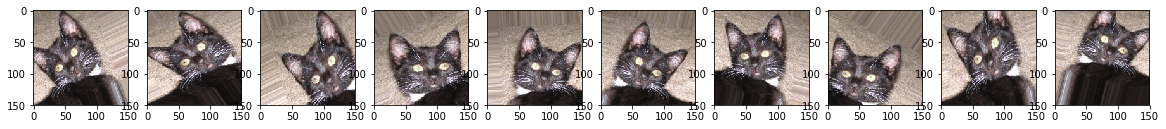

In [31]:
# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
plt.figure(figsize=(20,12)) # 사이즈가 20x12인 figure를 
for batch in datagen.flow(y, batch_size=10, shuffle=False):
#     plt.figure(i)
    plt.subplot(4,10,i+1)
    imgplot=plt.imshow(image.array_to_img(batch[5]))
    i+=1
    if i % 10 == 0:
        break
        
plt.show()

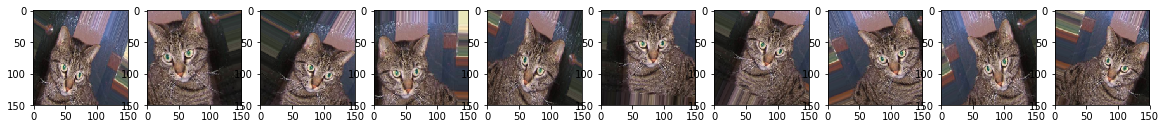

In [33]:
i=0
plt.figure(figsize=(20,12)) # 사이즈가 20x12인 figure를 생성
for batch in datagen.flow(y, batch_size=20, shuffle=False):
#     plt.figure(i)
    plt.subplot(4,10,i+1) # plt.subplot(nrows, ncols, index)
    imgplot=plt.imshow(image.array_to_img(batch[1]))
    i+=1
    if i % 10 == 0:
        break
        
plt.show()

## 5-3: Using a pretrained convnet

In [36]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', 
                 include_top = False, 
                 input_shape=(150,150,3))

58892288/58889256 [==============================] - 15s 0us/step


W0717 14:28:27.469405  5956 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0717 14:28:27.470370  5956 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [37]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [38]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, 
                                           target_size=(150,150),
                                           batch_size=batch_size, 
                                           class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i +=1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를
            # 한 번씩 처리하고 나면 중지합니다
            break
        return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [40]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), 
             loss='binary_crossentropy', 
             metrics=['acc'])

history = model.fit(train_features, train_labels, 
                   epochs=30, 
                   batch_size=20, 
                   validation_data = (validation_features, validation_labels))

W0717 14:56:28.808358  5956 deprecation.py:506] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0717 14:56:28.840598  5956 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 14:56:28.848995  5956 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6921 - acc: 0.9940 - val_loss: 0.6865 - val_acc: 0.9890
Epoch 2/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6831 - acc: 0.9955 - val_loss: 0.6812 - val_acc: 0.9890
Epoch 3/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6748 - acc: 0.9965 - val_loss: 0.6748 - val_acc: 0.9890
Epoch 4/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6659 - acc: 0.9975 - val_loss: 0.6659 - val_acc: 0.9890
Epoch 5/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6562 - acc: 0.9985 - val_loss: 0.6555 - val_acc: 0.9890
Epoch 6/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6482 - acc: 0.9970 - val_loss: 0.6471 - val_acc: 0.9890
Epoch 7/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6389 - acc: 0.9980 - val_loss: 0.6388 - val_acc: 0.9900
Epoch 8/30
200

In [ ]:
# project: cnn으로 (기존 모델은 부록으로 )